#### Classification Model

# Predicting Employee Churn

In [1]:
''' This notebook explores Employee data. The goal of this project is to build a classification model which we can use to see 
the likeliness of employees leaving the company given their status and satisfaction levels. And with it, identify the 
individuals who need boost and motivation. '''

__author__ = 'Noel Joseph Padilla'
__email__ = 'nino.padilla87@gmail.com'

## <span style="color:RoyalBlue"> I. Import Libraries </span>

Import Relevant Libraries to be used for analysis.

In [2]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# (Optional) Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## <span style="color:RoyalBlue"> II. Exploratory Analysis </span>

In [3]:
df = pd.read_csv('employee_data.csv')

In [4]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [5]:
df.shape

(14249, 10)

In [6]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

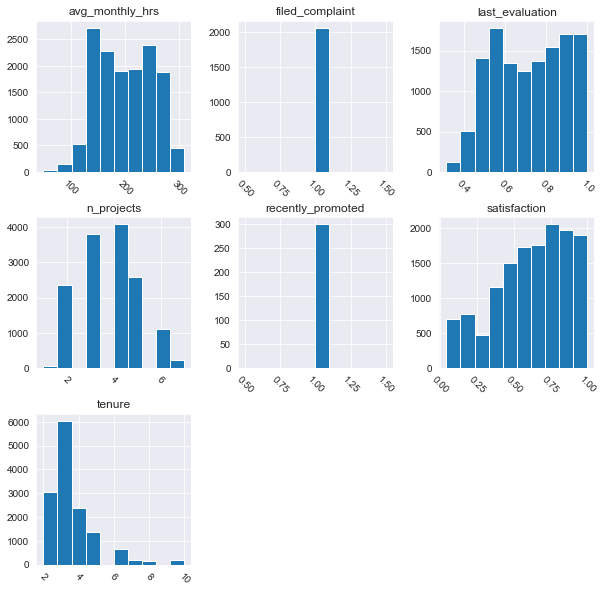

In [7]:
df.hist(figsize=(10,10), xrot=-45)
plt.show()

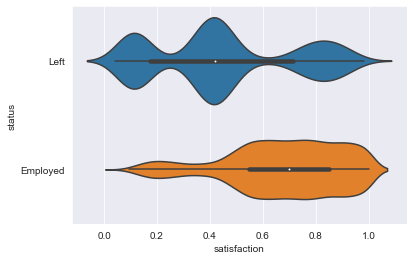

In [8]:
# Segmentation of Satisfaction Level to Current Status
sns.violinplot(y='status', x='satisfaction', data=df)
plt.show()

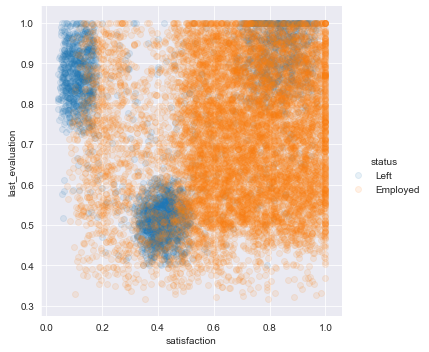

In [9]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='satisfaction',
           y='last_evaluation',
           hue='status',
           data=df,
           fit_reg=False,
           scatter_kws={'alpha':0.1})
plt.show()

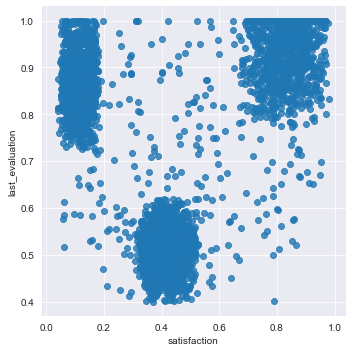

In [10]:
# Scatterplot of satisfaction vs. last_evaluation (only those who have left)
sns.lmplot(x='satisfaction',
           y='last_evaluation',
           data=df[df.status == 'Left'],
           fit_reg=False)
plt.show()

## <span style="color:RoyalBlue"> III. Data Cleaning </span>

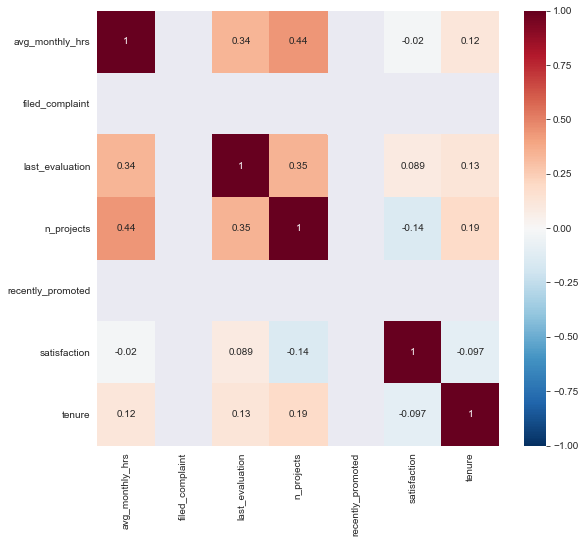

In [11]:
corr = df.corr()

plt.figure(figsize=(9,8))
sns.heatmap(corr,
            annot=True,
            cmap='RdBu_r',
            vmin=-1,
            vmax=1)
plt.show()

In [12]:
df.filed_complaint.fillna(0, inplace=True)
df.recently_promoted.fillna(0, inplace=True)

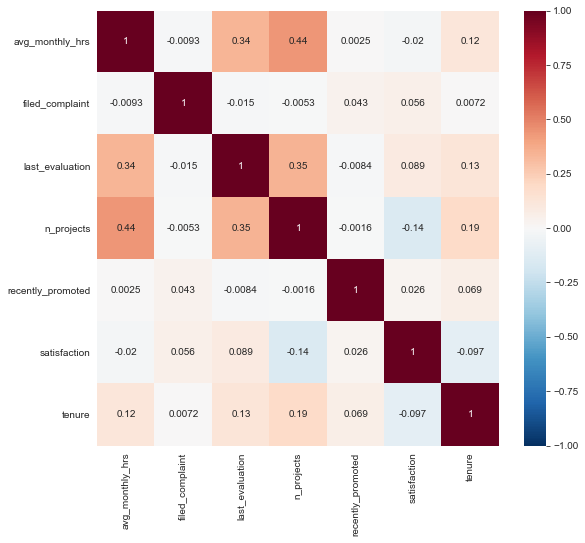

In [13]:
corr = df.corr()

plt.figure(figsize=(9,8))
sns.heatmap(corr,
            annot=True,
            cmap='RdBu_r',
            vmin=-1,
            vmax=1)
plt.show()

In [14]:
# Replace all instances of the 'information_technology' class with 'IT' instead
df.department.replace('information_technology', 'IT', inplace=True)

In [15]:
# Since we are looking into predicting possible churning, remove temporary employees
df = df[df.department != 'temp']

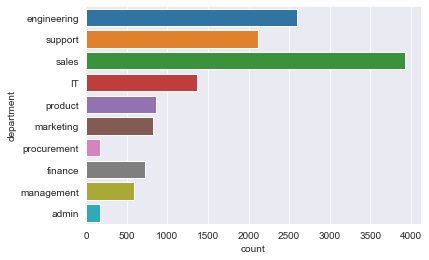

In [16]:
sns.countplot(y='department', data=df)
plt.show()

## <span style="color:RoyalBlue"> IV. Feature Engineering Construction </span>

In [17]:
df['salary_numeric'] = df.salary.replace({'low': 0, 'medium': 1, 'high': 2})

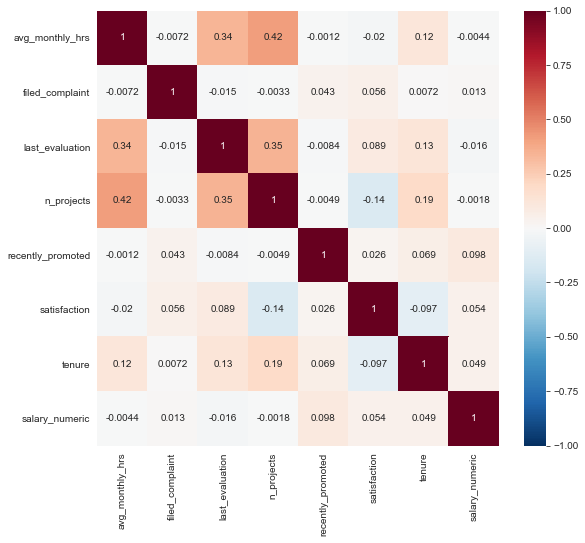

In [18]:
corr = df.corr()

plt.figure(figsize=(9,8))
sns.heatmap(corr,
            annot=True,
            cmap='RdBu_r',
            vmin=-1,
            vmax=1)
plt.show()

In [19]:
df.shape

(14068, 11)

In [20]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
salary_numeric         int64
dtype: object

In [21]:
df.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,salary_numeric
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0
1,232,support,0.0,NaN,3,0.0,low,0.834544,Employed,2.0,0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,1
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0
5,140,sales,0.0,0.589097,4,0.0,medium,0.660020,Employed,4.0,1
6,121,sales,1.0,0.625399,3,0.0,low,0.835571,Employed,3.0,0
7,150,engineering,0.0,0.644586,4,0.0,low,0.796683,Employed,3.0,0
8,215,engineering,1.0,0.524114,3,0.0,medium,0.715005,Employed,7.0,1
9,269,support,0.0,0.909364,5,0.0,medium,0.994037,Employed,2.0,1


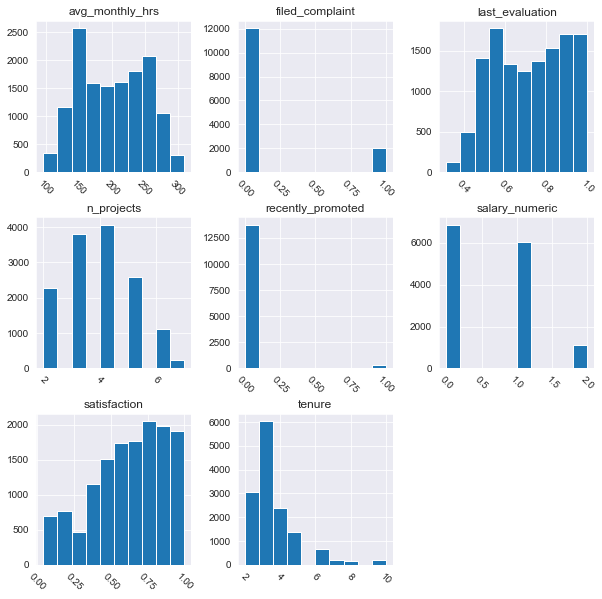

In [22]:
df.hist(figsize=(10,10), xrot=-45)
plt.show()

In [23]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_numeric
count,14068.000000,14068.000000,12717.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000
mean,201.083736,0.143944,0.718477,3.801038,0.021325,0.621295,3.497228,0.592764
std,49.959962,0.351045,0.173062,1.236058,0.144470,0.250469,1.460917,0.635435
min,96.000000,0.000000,0.316175,2.000000,0.000000,0.040058,2.000000,0.000000
25%,156.000000,0.000000,0.563866,3.000000,0.000000,0.450390,3.000000,0.000000
50%,200.000000,0.000000,0.724939,4.000000,0.000000,0.652527,3.000000,1.000000
75%,245.000000,0.000000,0.871358,5.000000,0.000000,0.824951,4.000000,1.000000
max,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000,2.000000


In [24]:
# Distribution of Categorical Features
df.describe(include=['object'])

,department,salary,status
count,13359,14068,14068
unique,10,3,2
top,sales,low,Employed
freq,3923,6871,10701


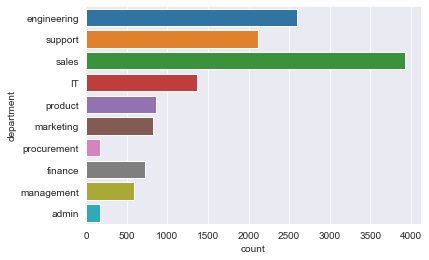

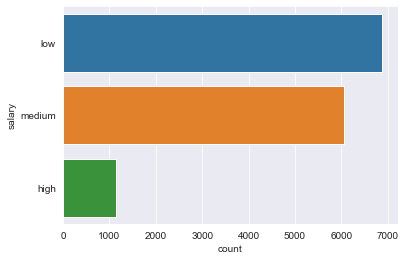

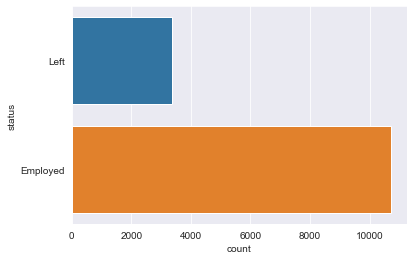

In [25]:
# Using a loop, display bar plots for each of the categorical features
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

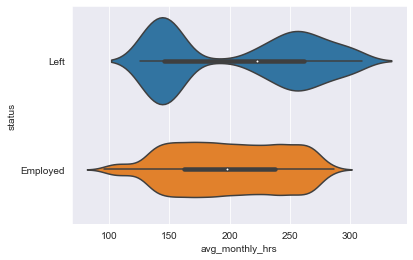

In [26]:
sns.violinplot(y='status', x='avg_monthly_hrs', data=df)
plt.show()

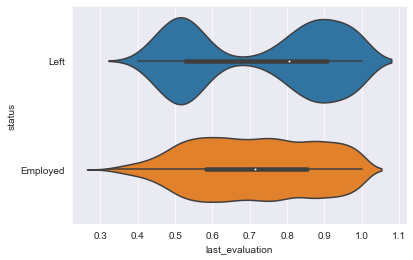

In [27]:
sns.violinplot(y='status', x='last_evaluation', data=df)
plt.show()

In [28]:
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_numeric
status,,,,,,,,
Employed,199.142230,0.174843,0.714479,3.786282,0.026353,0.675979,3.380245,0.648724
Left,207.254232,0.045738,0.730706,3.847936,0.005346,0.447500,3.869023,0.414909


In [29]:
# Group Employees Who Worked the Most on a Monthly Average
df.groupby('department').mean().sort_values(by='avg_monthly_hrs')

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_numeric
department,,,,,,,,
procurement,199.482759,0.183908,0.699205,3.885057,0.057471,0.627930,3.264368,0.557471
marketing,199.664225,0.159951,0.715018,3.687424,0.048840,0.629122,3.567766,0.620269
product,199.991860,0.151163,0.719616,3.817442,0.000000,0.628774,3.487209,0.577907
sales,200.842467,0.141728,0.711254,3.772878,0.024726,0.623075,3.527148,0.556207
support,200.975495,0.155042,0.723200,3.804430,0.008483,0.626923,3.394910,0.554194
management,201.025210,0.173109,0.729714,3.857143,0.114286,0.630428,4.294118,1.057143
finance,201.175824,0.119505,0.723880,3.815934,0.019231,0.586787,3.543956,0.641484
admin,201.272727,0.096591,0.726282,3.897727,0.028409,0.611450,3.369318,0.596591
IT,202.174453,0.140876,0.720017,3.810219,0.005109,0.628079,3.456204,0.572263


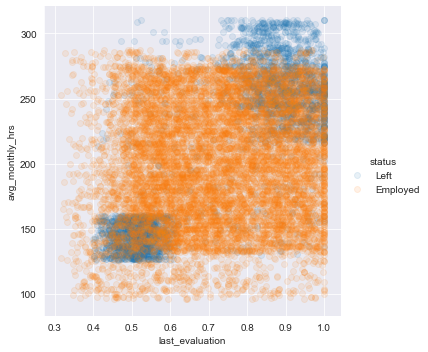

In [30]:
# Plot a bivariate segmentation for 'last_evaluation' and 'avg_monthly_hrs' segmented by 'status'
sns.lmplot(y='avg_monthly_hrs', x='last_evaluation', data=df, hue='status', scatter_kws={'alpha':0.1}, fit_reg=False,)
plt.show()

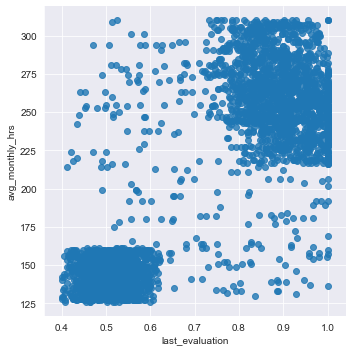

In [31]:
# Plot another scatterplot of 'last_evaluation' and 'avg_monthly_hrs', but only for employees who have 'Left'
sns.lmplot(x='last_evaluation', y='avg_monthly_hrs', data=df[df.status=='Left'], fit_reg=False)
plt.show()

## <span style="color:RoyalBlue"> V. Analytical Base Table (ABT) Construction </span>

In [32]:
df = pd.read_csv('employee_data.csv')
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [33]:
# Drop Duplicate Observations
df.drop_duplicates(inplace=True)
df.shape

(14221, 10)

In [34]:
# Drop Observations from 'Temporary Employees'
df = df[df.department != 'temp']
df.shape

(14068, 10)

In [35]:
# Check Features that should be Indicator Variables
print(df['filed_complaint'].unique())
print(df['recently_promoted'].unique())

[nan  1.]
[nan  1.]


In [36]:
# Fill Indicator Variables with Missing Values with 0
df['filed_complaint'].fillna(0, inplace=True)
df['recently_promoted'].fillna(0, inplace=True)

In [37]:
print(df['filed_complaint'].unique())
print(df['recently_promoted'].unique())

[0. 1.]
[0. 1.]


In [38]:
# Check and Display Unique Classes of the 'Department' Feature
print(df['department'].unique())

['engineering' 'support' 'sales' 'IT' 'product' 'marketing' 'procurement'
 'finance' nan 'management' 'information_technology' 'admin']


In [39]:
# Label Missing Values as Missing
df['department'].fillna('Missing', inplace=True) 

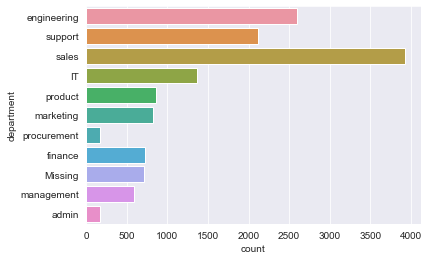

In [40]:
# Replace values where there are typos, inconsistent capitalization, or mislabeled classes 
df['department'].replace('information_technology', 'IT', inplace=True)

# Visualize 
sns.countplot(y='department', data=df)

In [41]:
# Handle Missing Data
df.isnull().sum()

avg_monthly_hrs         0
department              0
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [42]:
# Flag 'last_evaluation' with an indicator of missingness
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

# Then fill original missing values with 0
df.last_evaluation.fillna(0, inplace=True)

In [43]:
# Display the number of missing values for each feature (both categorical and numeric) 
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

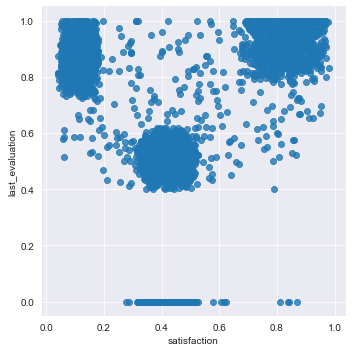

In [44]:
# Visuallize 'last_evaluation' with 'satisfaction' variable 
sns.lmplot(y='last_evaluation', x='satisfaction', data=df[df.status == 'Left'], fit_reg=False)
plt.show()

Quick Analysis

Based on the top half, it looks like there are 3 clusters of people who left.
1. First, we have people with high <code style="color:steelblue">'last_evaluation'</code> but low <code style="color:steelblue">'satisfaction'</code>. Maybe these people were overqualified, frustrated, or **unhappy** in some other way.
2. Next, we have people with low <code style="color:steelblue">'last_evaluation'</code> and medium <code style="color:steelblue">'satisfaction'</code>. These were probably **underperformers** or poor cultural fits.
3. Finally, we have people with high <code style="color:steelblue">'last_evaluation'</code> and high <code style="color:steelblue">'satisfaction'</code>. Perhaps these were **overachievers** who found better offers elsewhere.

These roughly translate to 3 indicator features we can engineer:

* <code style="color:steelblue">'underperformer'</code> - last_evaluation < 0.6 and last_evaluation_missing == 0
* <code style="color:steelblue">'unhappy'</code> - satisfaction_level < 0.2
* <code style="color:steelblue">'overachiever'</code> - last_evaluation > 0.8 and satisfaction > 0.7

In [45]:
# Create indicator features
df['underperformer'] = ((df.last_evaluation < 0.6) & 
                        (df.last_evaluation_missing == 0)).astype(int)

df['unhappy'] = (df.satisfaction < 0.2).astype(int)

df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)

In [46]:
df[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

In [47]:
# Convert 'status' to an indicator variable
df['status'] = pd.get_dummies( df.status ).Left

In [48]:
# Overwrite dataframe with dummy variables version for the categorical features
df = pd.get_dummies(df, columns=['department', 'salary'])
df.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,unhappy,overachiever,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [49]:
# Save Analytical Base Table for Model Evaluation
df.to_csv('analytical_base_table.csv', index=None)

## <span style="color:RoyalBlue"> VI. Model Training </span>

In [50]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# StandardScaler
from sklearn.preprocessing import StandardScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Classification metrics
from sklearn.metrics import roc_curve, roc_auc_score

In [51]:
# Load analytical base table
abt = pd.read_csv('analytical_base_table.csv')

In [52]:
# Create separate object for target variable
y = abt.status

# Create separate object for input features
X = abt.drop('status', axis=1)

In [53]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=abt.status)

# Print number of observations in X_train, X_test, y_train, and y_test
print( len(X_train), len(X_test), len(y_train), len(y_test) )

11254 2814 11254 2814


We passed in the argument **test_size=0.2** to set aside 20% of our observations for the test set. We put **random_state=1234** to set the random state for replicable results. We also included the argument **stratify=abt.status** in order to make sure the target variable's classes are balanced in each subset of data. This is stratified random sampling.

In [54]:
# Import Relevant Packages (1) make_pipeline() for building the pipeline & (2) StandardScaler() for standardization
# Create Pipeline Dictionary  

pipelines = {
    'lg' : make_pipeline(StandardScaler(), LogisticRegression(random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

#### The Pipeline Dictionary is as follows:
   * <code style="color:crimson">'lg'</code> for Regularized logistic regression
   * <code style="color:crimson">'rf'</code> for random forest
   * <code style="color:crimson">'gb'</code> for gradient boosted tree.

Afterwards, declare Hyperparameter Grids. There are two types of parameters when using machine learning algorithms. (1) Model Parameters & (2) Hyperparameters.The key distinction is that model parameters can be learned directly from the training data while hyperparameters cannot so they must be tuned.

In [55]:
# Logistic Regression hyperparameters
lg_hyperparameters = {
    'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}

Next, we then declare the hyperparameter grid for random forest. For random forests, the first hyperparameter to tune is n_estimators. The second one we'll tune is max_features. The third one we'll tune is min_samples_leaf.

In [56]:
# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf': [1, 3, 5, 10]
}

We then declare the hyperparameter grid for the boosted tree. For boosted trees, we'll tune n_estimators as well. The second one we'll tune is learning_rate. Finally, we'll tune max_depth. 

In [57]:
# Boosted Tree hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

In [58]:
# Store hyperparameters in one single dictionary
hyperparameters = {
    'lg' : lg_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In [59]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lg has been fitted.
rf has been fitted.
gb has been fitted.


In [60]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lg 0.8493863035326624
rf 0.9796513913558318
gb 0.9753863824748372


In [61]:
# Using a for loop, print the AUROC performance of each model in fitted_models on the test set.
for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    
    print( name, roc_auc_score(y_test, pred) )

lg 0.9015381433597084
rf 0.9915194952019338
gb 0.9893274517955185


The "roc_auc_score" tells how much the model is capable of distinguishing between classes. the higher the AUC, the better the model. An excellent model has AUC near 1 which means it has good measure of separability. A poor model has AUC near to the 0 which means it has worst measure of separability. In fact it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means model has no class separation capacity whatsoever.


The random forest model had the highest test AUROC and the highest cross-validated score.

In [62]:
import pickle

# Save winning model as final_model.pkl
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)